In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fnm


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier



plt.rcParams['font.family']='Malgun Gothic'



In [2]:
fd1=pd.read_excel('d:\\data2\\신한\\finance_data201903.xlsx')

In [3]:
fd2=pd.read_excel('d:\\data2\\신한\\finance_data201909.xlsx')

In [4]:
fd3=pd.read_excel('d:\\data2\\신한\\finance_data202003.xlsx')

In [5]:
fd4=pd.read_excel('d:\\data2\\신한\\finance_data202009.xlsx')

In [6]:
fd5=pd.read_excel('d:\\data2\\신한\\finance_data202103.xlsx')

In [7]:
df=pd.concat([fd1,fd2,fd3,fd4,fd5],axis=0)

In [9]:
df

,기준년월,지역구,법정동코드,법정동,집계구코드,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,강남구,11680101,역삼동,1123064010001,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,201903,강남구,11680101,역삼동,1123064010001,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,201903,강남구,11680101,역삼동,1123064010001,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,201903,강남구,11680101,역삼동,1123064010001,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
4,201903,강남구,11680101,역삼동,1123064010001,4,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211881,202103,중랑구,11260106,신내동,1107070010802,5,2,0,0,0,0,1425069,4369530,9185200,0,0,0,0,0,0
211882,202103,중랑구,11260106,신내동,1107070010802,6,1,0,0,0,738450,2015000,6877740,2478000,0,0,0,0,0,0
211883,202103,중랑구,11260106,신내동,1107070010802,6,2,0,0,0,595480,1495569,9297919,19789456,0,0,0,0,0,0
211884,202103,중랑구,11260106,신내동,1107070010802,7,1,0,0,0,409938,812073,5018284,0,0,0,0,0,0,0


## 결측치 확인

In [101]:
df.isnull().sum()

기준년월        0
지역구         0
법정동코드       0
법정동         0
집계구코드       0
나이          0
성별          0
직장인여부       0
급여입금        0
가맹점매출입금     0
연금입금        0
총소비금액       0
총수신금액       0
예적금금액       0
신탁금액        0
수익증권금액      0
신용대출금액      0
담보대출금액      0
주택대출금액      0
전세자금대출금액    0
dtype: int64

## 명목형 변수 확인

In [10]:
df[df.columns[df.dtypes.map(lambda x: x=='object')]].describe().transpose()

,count,unique,top,freq
지역구,1039568,25,송파구,68405
법정동,1039568,451,신림동,27423


## 컬럼 제거

중복되는 법정동코드, 집계구 코드를 제거하고 451개의 종류가 있는 법정동 컬럼도 삭제한다.

In [11]:
df1=df.drop(['법정동코드','법정동','집계구코드'],axis=1)

In [12]:
df1

,기준년월,지역구,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,강남구,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,201903,강남구,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,201903,강남구,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,201903,강남구,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
4,201903,강남구,4,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211881,202103,중랑구,5,2,0,0,0,0,1425069,4369530,9185200,0,0,0,0,0,0
211882,202103,중랑구,6,1,0,0,0,738450,2015000,6877740,2478000,0,0,0,0,0,0
211883,202103,중랑구,6,2,0,0,0,595480,1495569,9297919,19789456,0,0,0,0,0,0
211884,202103,중랑구,7,1,0,0,0,409938,812073,5018284,0,0,0,0,0,0,0


In [13]:
df1.나이.unique()

array([2, 3, 4, 5, 6, 7], dtype=int64)

In [14]:
date=df1.기준년월.unique()
region=df1.지역구.unique()
age=df1.나이.unique()
region

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [ ]:
df2=df1.copy()

## 타겟층 데이터만 추출

특징을 알아내고자 하는 대상인 MZ세대에 해당하는 20대~30대만 추출한다.

In [16]:
mz=df2.loc[(df2.나이==2)|(df2.나이==3),]
mz.head()

,기준년월,지역구,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,강남구,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,201903,강남구,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,201903,강남구,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,201903,강남구,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
12,201903,강남구,2,1,0,0,0,0,1165127,3819592,0,0,0,0,0,0,0


## 데이터 그룹핑

기존의 집계구 단위였던 법정동을 삭제했으므로 그 윗 행정단위인 지역구 단위로 재 그룹핑을 실시한다.

In [103]:
mz2=mz.groupby(['기준년월','지역구','나이','성별','직장인여부'],as_index=False)[['급여입금','가맹점매출입금','연금입금','총소비금액','총수신금액','예적금금액','신탁금액','수익증권금액','신용대출금액','담보대출금액','주택대출금액','전세자금대출금액']].sum()
mz2

,기준년월,지역구,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,강남구,2,1,0,0,0,0,832296525,2498639737,2942296929,73111972,88805198,0,15418027,0,0
1,201903,강남구,2,1,1,6798843,0,0,8555087,17422530,19045834,0,0,0,0,0,0
2,201903,강남구,2,2,0,0,0,0,955456366,2942503507,3005634012,66489776,73084705,0,13791371,0,0
3,201903,강남구,2,2,1,30714824,0,0,32924690,106455735,78817184,0,0,23397978,96240169,0,103658333
4,201903,강남구,3,1,0,0,0,0,1115691492,3313750670,3909742223,145982282,48196955,206074931,2379892969,135765241,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,202103,중랑구,2,2,1,19432103,0,0,18664888,61447630,41536692,0,0,0,389570463,0,400393865
981,202103,중랑구,3,1,0,0,0,0,1014832557,2009304603,2248010801,50000,0,23091111,1829560092,0,232689749
982,202103,중랑구,3,1,1,125306493,0,0,95106024,371400256,213075437,5377132,0,245783483,860522416,215417580,495969046
983,202103,중랑구,3,2,0,0,2777948,0,935951185,2380358335,2491781161,793037,0,34783908,697059731,0,88285714


## 통계량

mz세대에 해당하는 20대와 30대로 구분하여 중앙값, 평균값, 표준편차등을 파악

각 연령대에 금융정보를 보면 전반적으로 20대는 중앙값(50%)과 평균값(mean)의 차이가 큰 것을 확인할 수 있다. => 금융 자산의 양극화가 있다. 이는 취준생, 대학생, 취업자가 혼재되어 있기 때문인 것으로 보인다.


20대는 신탁금액 평균이 수익증권금액 평균보다 작다  (0.42배) ※(신탁금액평균/수익증권평균금액)
30대는 신탁금액 평균이 수익증권금액 평균보다 크다   (2.1배)

=>수익증권 금액은 주로 펀드 / 신탁금액은 연금 저축, 투자 신탁등에 해당.
투자성향 (다만, 연금 저축 상품으로 인한 차이가 있을 수 있으므로 신한은행에서 해당 상품에 대한 정보가 필요할 것으로 보임)


20대 평균 대출 상품 잔액 크기 : 담보대출 > 전세자금 > 신용대출
30대 평균 대출 상품 잔액 크기 : 담보대출 > 전세자금 > 신용대출 > 주택대출



In [106]:
mz2.loc[mz2.나이==2,'급여입금':].describe()

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
count,485.000,485.000,485.000,485.000,485.000,485.000,485.000,485.000,485.000,485.000,485.000,485.000
mean,12023873.759,0.000,8427.348,298527735.029,764166625.854,728124507.227,1956369.078,4640108.973,12790117.287,107334921.563,0.000,80155189.441
std,27060886.872,0.000,51036.718,304716557.267,822420723.960,837295993.642,8566843.562,16207222.990,59969646.700,332336175.477,0.000,312476494.315
min,0.000,0.000,0.000,1294149.000,1777237.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,14031042.000,41665338.000,31109809.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,210280248.000,495592790.000,397269886.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,11973098.000,0.000,0.000,547629242.000,1329679662.000,1247852552.000,0.000,0.000,0.000,88195652.000,0.000,60950000.000
max,225203228.000,0.000,395793.000,1108890963.000,3563054471.000,3455655789.000,77866478.000,150605898.000,717988954.000,3638055985.000,0.000,3568779846.000


In [107]:
mz2.loc[mz2.나이==3,'급여입금':].describe()

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
count,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000
mean,122815646.132,235833.070,4622.708,524352376.428,1568856479.274,1514804546.816,35442074.484,16772770.326,347861407.224,1325873375.018,21701482.704,455709897.918
std,177335970.855,1587248.625,35847.857,398685257.145,1092889663.418,1293577632.716,51096607.420,35811894.958,558986073.991,1788819688.731,76259470.298,1039282373.346
min,0.000,0.000,0.000,6542156.000,31278144.000,7898463.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,136000198.750,585990676.000,398525743.500,3052620.250,0.000,14117854.000,261064795.750,0.000,0.000
50%,4831964.500,0.000,0.000,459366463.000,1455690826.500,1171066236.000,16120563.000,3745817.000,101480268.500,736700695.500,0.000,86914583.000
75%,176351340.750,0.000,0.000,850260386.250,2251214505.250,2284563871.750,43368284.250,17077294.750,418462136.250,1778316913.000,0.000,425295367.000
max,778068005.000,21849388.000,331904.000,1697648863.000,5599151772.000,6579058985.000,331885150.000,311143296.000,4147808974.000,15859509512.000,658734065.000,9544984837.000


In [108]:
co=mz2[['급여입금','가맹점매출입금','연금입금','총소비금액','총수신금액','예적금금액','신탁금액','수익증권금액','신용대출금액','담보대출금액','주택대출금액','전세자금대출금액']]

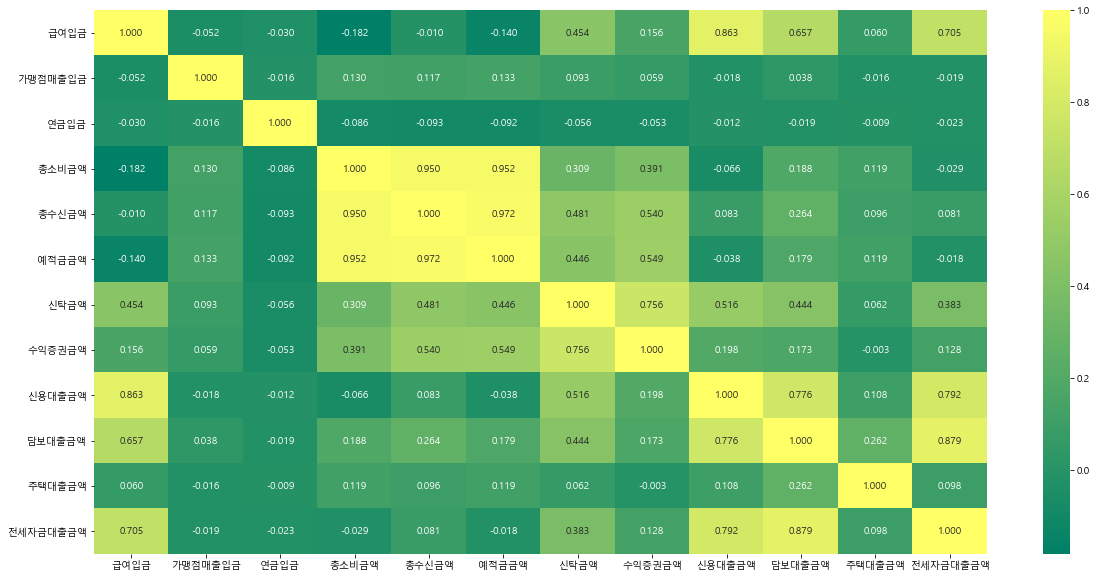

In [109]:
plt.figure(figsize=(20,10))
sns.heatmap(co.corr(),cmap='summer',annot=True,fmt='0.3f')
plt.show()

## 높은 상관관계를 가진 변수들을 이용해서 파생변수를 생성

'수신액대비소비율'=총수신금액 대비 소비가 발생하는 비율
예적금비율,신탁금액비율,수익증권비율 => 총 수신액 중 각 금액들이 차지하는 비중 

In [114]:
mz3=mz2.copy()

In [115]:
mz3['수신액대비소비율']=mz3.총소비금액/a1.총수신금액

In [116]:
mz3['예적금비율']=mz3.예적금금액/a1.총수신금액

In [117]:
mz3['신탁금액비율']=mz3.신탁금액/a1.총수신금액

In [118]:
mz3['수익증권비율']=mz3.수익증권금액/a1.총수신금액

In [119]:
mz3['전세자금대출비율']=mz3.전세자금대출금액/a1.담보대출금액

In [121]:
mz3.fillna(0,inplace=True) #(담보대출금액이 0인경우 null값이 발생 이를 0으로 대체)

In [122]:
mz3

,기준년월,지역구,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,...,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,수신액대비소비율,예적금비율,신탁금액비율,수익증권비율,전세자금대출비율
0,201903,강남구,2,1,0,0,0,0,832296525,2498639737,...,88805198,0,15418027,0,0,0.333,1.178,0.029,0.036,0.000
1,201903,강남구,2,1,1,6798843,0,0,8555087,17422530,...,0,0,0,0,0,0.491,1.093,0.000,0.000,0.000
2,201903,강남구,2,2,0,0,0,0,955456366,2942503507,...,73084705,0,13791371,0,0,0.325,1.021,0.023,0.025,0.000
3,201903,강남구,2,2,1,30714824,0,0,32924690,106455735,...,0,23397978,96240169,0,103658333,0.309,0.740,0.000,0.000,1.077
4,201903,강남구,3,1,0,0,0,0,1115691492,3313750670,...,48196955,206074931,2379892969,135765241,0,0.337,1.180,0.044,0.015,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,202103,중랑구,2,2,1,19432103,0,0,18664888,61447630,...,0,0,389570463,0,400393865,0.304,0.676,0.000,0.000,1.028
981,202103,중랑구,3,1,0,0,0,0,1014832557,2009304603,...,0,23091111,1829560092,0,232689749,0.505,1.119,0.000,0.000,0.127
982,202103,중랑구,3,1,1,125306493,0,0,95106024,371400256,...,0,245783483,860522416,215417580,495969046,0.256,0.574,0.014,0.000,0.576
983,202103,중랑구,3,2,0,0,2777948,0,935951185,2380358335,...,0,34783908,697059731,0,88285714,0.393,1.047,0.000,0.000,0.127


In [123]:
co1=mz3.iloc[:,5:]

## 상관관계 재확인

C:\Users\wanw9\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wanw9\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


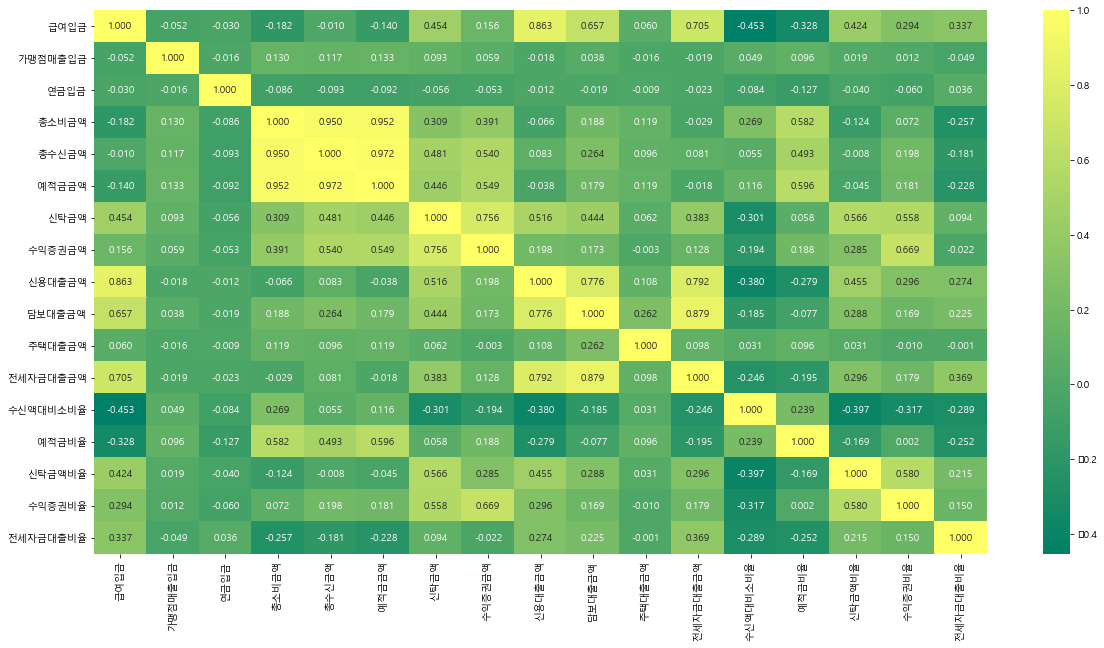

In [124]:
plt.figure(figsize=(20,10))
sns.heatmap(co1.corr(),cmap='summer',annot=True,fmt='0.3f')
plt.show()

In [125]:
mz4=mz3.copy()

### 코로나로 인한 거리두기 시행 이전 데이터 

In [127]:
bcov=mz4.loc[(mz4.기준년월==201903)|(mz4.기준년월==201909)|(mz4.기준년월==202003)]

In [128]:
bcov

,기준년월,지역구,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,...,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,수신액대비소비율,예적금비율,신탁금액비율,수익증권비율,전세자금대출비율
0,201903,강남구,2,1,0,0,0,0,832296525,2498639737,...,88805198,0,15418027,0,0,0.333,1.178,0.029,0.036,0.000
1,201903,강남구,2,1,1,6798843,0,0,8555087,17422530,...,0,0,0,0,0,0.491,1.093,0.000,0.000,0.000
2,201903,강남구,2,2,0,0,0,0,955456366,2942503507,...,73084705,0,13791371,0,0,0.325,1.021,0.023,0.025,0.000
3,201903,강남구,2,2,1,30714824,0,0,32924690,106455735,...,0,23397978,96240169,0,103658333,0.309,0.740,0.000,0.000,1.077
4,201903,강남구,3,1,0,0,0,0,1115691492,3313750670,...,48196955,206074931,2379892969,135765241,0,0.337,1.180,0.044,0.015,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,202003,중랑구,2,2,1,9700426,0,0,10197163,33050579,...,0,0,0,0,0,0.309,0.859,0.000,0.000,0.000
589,202003,중랑구,3,1,0,0,0,0,869808036,1906841211,...,0,0,555154437,0,0,0.456,1.169,0.000,0.000,0.000
590,202003,중랑구,3,1,1,104307578,0,0,71702008,324229305,...,0,41699117,268027128,0,73700000,0.221,0.671,0.016,0.000,0.275
591,202003,중랑구,3,2,0,0,0,0,827285145,2197287385,...,0,0,190666524,0,0,0.377,1.101,0.005,0.000,0.000


In [130]:
bcov1=bcov.drop('기준년월',axis=1)

In [39]:
bcov1.columns

Index(['지역구', '나이', '성별', '직장인여부', '급여입금', '가맹점매출입금', '연금입금', '총소비금액', '총수신금액',
       '예적금금액', '신탁금액', '수익증권금액', '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액',
       '수신액대비소비율', '예적금비율', '신탁금액비율', '수익증권비율', '전세자금대출비율'],
      dtype='object')

### 컬럼위치 조정

In [131]:
bcov1=bcov1[['나이','성별','지역구','직장인여부', '급여입금', '가맹점매출입금', '연금입금', '총소비금액', '총수신금액',
       '예적금금액', '신탁금액', '수익증권금액', '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액',
       '수신액대비소비율', '예적금비율', '신탁금액비율', '수익증권비율', '전세자금대출비율']]

In [132]:
bcov1

,나이,성별,지역구,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,...,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,수신액대비소비율,예적금비율,신탁금액비율,수익증권비율,전세자금대출비율
0,2,1,강남구,0,0,0,0,832296525,2498639737,2942296929,...,88805198,0,15418027,0,0,0.333,1.178,0.029,0.036,0.000
1,2,1,강남구,1,6798843,0,0,8555087,17422530,19045834,...,0,0,0,0,0,0.491,1.093,0.000,0.000,0.000
2,2,2,강남구,0,0,0,0,955456366,2942503507,3005634012,...,73084705,0,13791371,0,0,0.325,1.021,0.023,0.025,0.000
3,2,2,강남구,1,30714824,0,0,32924690,106455735,78817184,...,0,23397978,96240169,0,103658333,0.309,0.740,0.000,0.000,1.077
4,3,1,강남구,0,0,0,0,1115691492,3313750670,3909742223,...,48196955,206074931,2379892969,135765241,0,0.337,1.180,0.044,0.015,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,2,2,중랑구,1,9700426,0,0,10197163,33050579,28395731,...,0,0,0,0,0,0.309,0.859,0.000,0.000,0.000
589,3,1,중랑구,0,0,0,0,869808036,1906841211,2228470250,...,0,0,555154437,0,0,0.456,1.169,0.000,0.000,0.000
590,3,1,중랑구,1,104307578,0,0,71702008,324229305,217453603,...,0,41699117,268027128,0,73700000,0.221,0.671,0.016,0.000,0.275
591,3,2,중랑구,0,0,0,0,827285145,2197287385,2418437772,...,0,0,190666524,0,0,0.377,1.101,0.005,0.000,0.000


## 데이터 범주화

In [146]:
le=LabelEncoder()

In [134]:
bcov1.지역구=le.fit_transform(bcov1.지역구)

In [135]:
bcov1

,나이,성별,지역구,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,...,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,수신액대비소비율,예적금비율,신탁금액비율,수익증권비율,전세자금대출비율
0,2,1,0,0,0,0,0,832296525,2498639737,2942296929,...,88805198,0,15418027,0,0,0.333,1.178,0.029,0.036,0.000
1,2,1,0,1,6798843,0,0,8555087,17422530,19045834,...,0,0,0,0,0,0.491,1.093,0.000,0.000,0.000
2,2,2,0,0,0,0,0,955456366,2942503507,3005634012,...,73084705,0,13791371,0,0,0.325,1.021,0.023,0.025,0.000
3,2,2,0,1,30714824,0,0,32924690,106455735,78817184,...,0,23397978,96240169,0,103658333,0.309,0.740,0.000,0.000,1.077
4,3,1,0,0,0,0,0,1115691492,3313750670,3909742223,...,48196955,206074931,2379892969,135765241,0,0.337,1.180,0.044,0.015,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,2,2,24,1,9700426,0,0,10197163,33050579,28395731,...,0,0,0,0,0,0.309,0.859,0.000,0.000,0.000
589,3,1,24,0,0,0,0,869808036,1906841211,2228470250,...,0,0,555154437,0,0,0.456,1.169,0.000,0.000,0.000
590,3,1,24,1,104307578,0,0,71702008,324229305,217453603,...,0,41699117,268027128,0,73700000,0.221,0.671,0.016,0.000,0.275
591,3,2,24,0,0,0,0,827285145,2197287385,2418437772,...,0,0,190666524,0,0,0.377,1.101,0.005,0.000,0.000


In [136]:
x=bcov1.iloc[:,1:]
y=bcov1.iloc[:,0]






# 데이터 모델링 (201903~202003)









## 훈련 데이터와 테스트 데이터 분리

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1,stratify=y)

print(x_train.shape)
print(x_test.shape)

(533, 20)
(60, 20)


## 의사결정 나무와 랜덤포레스트 사용

In [138]:
dt=DecisionTreeClassifier(random_state=1)
rf=RandomForestClassifier(n_estimators=200,random_state=5)

In [139]:
dt.fit(x_train,y_train)


DecisionTreeClassifier(random_state=1)

In [140]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=5)

In [141]:
dt_train_result=dt.predict(x_train)
dt_test_result=dt.predict(x_test)

In [142]:
rf_train_result=rf.predict(x_train)
rf_test_result=rf.predict(x_test)

## 의사결정트리 결과

In [147]:
print(accuracy_score(dt_train_result,y_train))
print(accuracy_score(dt_test_result,y_test))


1.0
0.8833333333333333


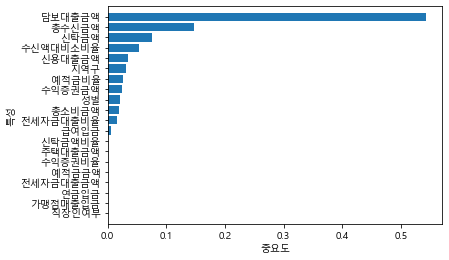

In [223]:
importances=dt.feature_importances_
indices=np.argsort(importances)[::1]
n_features = x_train.shape[1]
plt.barh(np.arange(n_features),importances[indices],align='center')
plt.yticks(np.arange(n_features),x_train.columns[indices])
plt.xlabel('중요도')
plt.ylabel('특성')
plt.ylim(-1,n_features)
plt.show()

## 랜덤포레스트 결과

In [148]:
print(accuracy_score(rf_train_result,y_train))
print(accuracy_score(rf_test_result,y_test))

1.0
0.9166666666666666


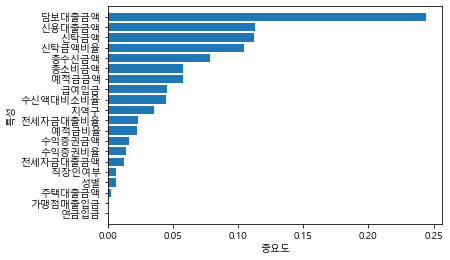

In [222]:
importances=rf.feature_importances_
indices=np.argsort(importances)[::1]
n_features = x_train.shape[1]
plt.barh(np.arange(n_features),importances[indices],align='center')
plt.yticks(np.arange(n_features),x_train.columns[indices])
plt.xlabel('중요도')
plt.ylabel('특성')
plt.ylim(-1,n_features)
plt.show()



## 최신 데이터를 타겟 데이터로 설정 (202103)



In [57]:
target=a2.loc[(a2.기준년월==202103)]

### 컬럼위치 조정

In [150]:
target1=target[['나이','성별','지역구','직장인여부', '급여입금', '가맹점매출입금', '연금입금', '총소비금액', '총수신금액',
       '예적금금액', '신탁금액', '수익증권금액', '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액',
       '수신액대비소비율', '예적금비율', '신탁금액비율', '수익증권비율', '전세자금대출비율']]

In [151]:
target1.지역구=le.fit_transform(target1.지역구)

C:\Users\wanw9\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### 타겟 데이터의 x와 y (t_x,t_y)


In [152]:
t_x=target1.iloc[:,1:]
t_y=target1.iloc[:,0]

### 예측

※ bov로 생성한 모델로 최신 데이터 (202103) 예측

In [156]:
target_result=rf.predict(t_x)

### 결과

In [157]:
print(accuracy_score(t_y,target_result))

0.9183673469387755


In [158]:
rf.feature_importances_

array([0.00626448, 0.03575212, 0.00664354, 0.0456645 , 0.00052942,
       0.0002548 , 0.05817509, 0.07831693, 0.05746859, 0.11241197,
       0.01643662, 0.11325631, 0.24443169, 0.00286177, 0.01294468,
       0.04465388, 0.02233069, 0.10420818, 0.01382865, 0.02356609])

91%의 정확도

## 코로나 거리두기 이후 데이터 추가 acov(202009)

In [65]:
acov=a2.loc[(a2.기준년월==202009)]

In [66]:
acov

,기준년월,지역구,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,...,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,수신액대비소비율,예적금비율,신탁금액비율,수익증권비율,전세자금대출비율
593,202009,강남구,2,1,0,0,0,0,885627596,2985726671,...,96343181,0,4055971,0,0,0.297,1.063,0.010,0.032,0.000
594,202009,강남구,2,1,1,9054404,0,0,11661073,37581199,...,0,0,0,0,0,0.310,1.037,0.000,0.000,0.000
595,202009,강남구,2,2,0,0,0,0,992587502,3563054471,...,104362133,0,67250000,0,0,0.279,0.958,0.002,0.029,0.000
596,202009,강남구,2,2,1,50909697,0,0,38672639,133920234,...,1218210,22246669,289210739,0,187991137,0.289,0.727,0.012,0.009,0.650
597,202009,강남구,3,1,0,0,0,0,1151352868,3722684106,...,125911417,155099574,2429862109,0,0,0.309,1.054,0.019,0.034,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,202009,중랑구,2,2,1,20069025,0,0,17873339,63334757,...,0,0,91500000,0,91500000,0.282,0.924,0.000,0.000,1.000
785,202009,중랑구,3,1,0,0,0,0,968175325,2044105182,...,0,25975169,983119643,0,0,0.474,1.025,0.000,0.000,0.000
786,202009,중랑구,3,1,1,123647982,0,0,88216599,417085341,...,0,209420289,578723394,0,328985154,0.212,0.738,0.000,0.000,0.568
787,202009,중랑구,3,2,0,0,0,0,900656060,2281942773,...,0,0,713274570,0,0,0.395,1.131,0.000,0.000,0.000


## 기존 모델을 구성하던 데이터와 결합  (bcov와 acov)

In [67]:
cov=pd.concat([bcov,acov],axis=0)

In [68]:
cov

,기준년월,지역구,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,...,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,수신액대비소비율,예적금비율,신탁금액비율,수익증권비율,전세자금대출비율
0,201903,강남구,2,1,0,0,0,0,832296525,2498639737,...,88805198,0,15418027,0,0,0.333,1.178,0.029,0.036,0.000
1,201903,강남구,2,1,1,6798843,0,0,8555087,17422530,...,0,0,0,0,0,0.491,1.093,0.000,0.000,0.000
2,201903,강남구,2,2,0,0,0,0,955456366,2942503507,...,73084705,0,13791371,0,0,0.325,1.021,0.023,0.025,0.000
3,201903,강남구,2,2,1,30714824,0,0,32924690,106455735,...,0,23397978,96240169,0,103658333,0.309,0.740,0.000,0.000,1.077
4,201903,강남구,3,1,0,0,0,0,1115691492,3313750670,...,48196955,206074931,2379892969,135765241,0,0.337,1.180,0.044,0.015,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,202009,중랑구,2,2,1,20069025,0,0,17873339,63334757,...,0,0,91500000,0,91500000,0.282,0.924,0.000,0.000,1.000
785,202009,중랑구,3,1,0,0,0,0,968175325,2044105182,...,0,25975169,983119643,0,0,0.474,1.025,0.000,0.000,0.000
786,202009,중랑구,3,1,1,123647982,0,0,88216599,417085341,...,0,209420289,578723394,0,328985154,0.212,0.738,0.000,0.000,0.568
787,202009,중랑구,3,2,0,0,0,0,900656060,2281942773,...,0,0,713274570,0,0,0.395,1.131,0.000,0.000,0.000


### 컬럼위치 조정

In [172]:
cov1=cov[['나이','성별','지역구','직장인여부', '급여입금', '가맹점매출입금', '연금입금', '총소비금액', '총수신금액',
       '예적금금액', '신탁금액', '수익증권금액', '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액',
       '수신액대비소비율', '예적금비율', '신탁금액비율', '수익증권비율', '전세자금대출비율']]

In [173]:
cov1.지역구=le.fit_transform(cov1.지역구)

C:\Users\wanw9\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [174]:
cov1

,나이,성별,지역구,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,...,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,수신액대비소비율,예적금비율,신탁금액비율,수익증권비율,전세자금대출비율
0,2,1,0,0,0,0,0,832296525,2498639737,2942296929,...,88805198,0,15418027,0,0,0.333,1.178,0.029,0.036,0.000
1,2,1,0,1,6798843,0,0,8555087,17422530,19045834,...,0,0,0,0,0,0.491,1.093,0.000,0.000,0.000
2,2,2,0,0,0,0,0,955456366,2942503507,3005634012,...,73084705,0,13791371,0,0,0.325,1.021,0.023,0.025,0.000
3,2,2,0,1,30714824,0,0,32924690,106455735,78817184,...,0,23397978,96240169,0,103658333,0.309,0.740,0.000,0.000,1.077
4,3,1,0,0,0,0,0,1115691492,3313750670,3909742223,...,48196955,206074931,2379892969,135765241,0,0.337,1.180,0.044,0.015,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,2,2,24,1,20069025,0,0,17873339,63334757,58511600,...,0,0,91500000,0,91500000,0.282,0.924,0.000,0.000,1.000
785,3,1,24,0,0,0,0,968175325,2044105182,2095354697,...,0,25975169,983119643,0,0,0.474,1.025,0.000,0.000,0.000
786,3,1,24,1,123647982,0,0,88216599,417085341,307925758,...,0,209420289,578723394,0,328985154,0.212,0.738,0.000,0.000,0.568
787,3,2,24,0,0,0,0,900656060,2281942773,2579740964,...,0,0,713274570,0,0,0.395,1.131,0.000,0.000,0.000


## 202009 데이터를 포함한 데이터 세트를 이용한 새로운 모델링 (201903~202009)

In [175]:
cx=cov1.iloc[:,1:]
cy=cov1.iloc[:,0]

In [176]:
cx_train,cx_test,cy_train,cy_test=train_test_split(cx,cy,test_size=0.1,random_state=1,stratify=cy)

print(cx_train.shape)
print(cx_test.shape)

(710, 20)
(79, 20)


In [177]:
rf1=RandomForestClassifier(n_estimators=200,random_state=5)

In [178]:
rf1.fit(cx_train,cy_train)

RandomForestClassifier(n_estimators=200, random_state=5)

In [179]:
c_train_result=rf1.predict(cx_train) 
c_test_result=rf1.predict(cx_test)

## 모델의 정확도 검증

In [180]:
print(accuracy_score(c_train_result,cy_train))
print(accuracy_score(c_test_result,cy_test))

1.0
0.9746835443037974


## 타겟 데이터 예측

In [181]:
target_result1=rf1.predict(t_x)

In [182]:
print(accuracy_score(t_y,target_result1))

0.9438775510204082


In [183]:
rf1.feature_importances_

array([0.0090485 , 0.03476081, 0.00448027, 0.04877826, 0.00049216,
       0.00027613, 0.06366464, 0.0754274 , 0.06579658, 0.13657532,
       0.01413376, 0.10436418, 0.1811378 , 0.00484879, 0.01630399,
       0.04234954, 0.02214377, 0.12726306, 0.01577317, 0.03238188])

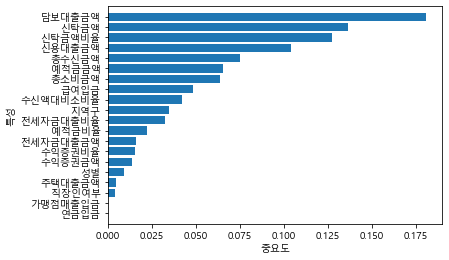

In [220]:
importances=rf1.feature_importances_
indices=np.argsort(importances)[::1]
n_features = x_train.shape[1]
plt.barh(np.arange(n_features),importances[indices],align='center')
plt.yticks(np.arange(n_features),x_train.columns[indices])
plt.xlabel('중요도')
plt.ylabel('특성')
plt.ylim(-1,n_features)
plt.show()

#### 결과
정확도가 0.91에서 0.94로 향상되었다.
feature_importance는 담보대출금액과 신탁금액 신탁금액비율 신용대출이 가장 높게 나타났다.
이전 모델링과 비교했을때 담보대출금액의 중요도가 다소 낮아졌지만 그 순서는 변함이 없었다.

### 전체 데이터 (201903~202103)

전체 데이터를 대상으로 RandomForest 모델을 적용하면?


In [189]:
mz5=mz3.copy()
mz5

,기준년월,지역구,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,...,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,수신액대비소비율,예적금비율,신탁금액비율,수익증권비율,전세자금대출비율
0,201903,강남구,2,1,0,0,0,0,832296525,2498639737,...,88805198,0,15418027,0,0,0.333,1.178,0.029,0.036,0.000
1,201903,강남구,2,1,1,6798843,0,0,8555087,17422530,...,0,0,0,0,0,0.491,1.093,0.000,0.000,0.000
2,201903,강남구,2,2,0,0,0,0,955456366,2942503507,...,73084705,0,13791371,0,0,0.325,1.021,0.023,0.025,0.000
3,201903,강남구,2,2,1,30714824,0,0,32924690,106455735,...,0,23397978,96240169,0,103658333,0.309,0.740,0.000,0.000,1.077
4,201903,강남구,3,1,0,0,0,0,1115691492,3313750670,...,48196955,206074931,2379892969,135765241,0,0.337,1.180,0.044,0.015,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,202103,중랑구,2,2,1,19432103,0,0,18664888,61447630,...,0,0,389570463,0,400393865,0.304,0.676,0.000,0.000,1.028
981,202103,중랑구,3,1,0,0,0,0,1014832557,2009304603,...,0,23091111,1829560092,0,232689749,0.505,1.119,0.000,0.000,0.127
982,202103,중랑구,3,1,1,125306493,0,0,95106024,371400256,...,0,245783483,860522416,215417580,495969046,0.256,0.574,0.014,0.000,0.576
983,202103,중랑구,3,2,0,0,2777948,0,935951185,2380358335,...,0,34783908,697059731,0,88285714,0.393,1.047,0.000,0.000,0.127


In [190]:
mz5.기준년월=le.fit_transform(mz5.기준년월)
mz5.지역구=le.fit_transform(mz5.지역구)

In [191]:
mz5

,기준년월,지역구,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,...,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,수신액대비소비율,예적금비율,신탁금액비율,수익증권비율,전세자금대출비율
0,0,0,2,1,0,0,0,0,832296525,2498639737,...,88805198,0,15418027,0,0,0.333,1.178,0.029,0.036,0.000
1,0,0,2,1,1,6798843,0,0,8555087,17422530,...,0,0,0,0,0,0.491,1.093,0.000,0.000,0.000
2,0,0,2,2,0,0,0,0,955456366,2942503507,...,73084705,0,13791371,0,0,0.325,1.021,0.023,0.025,0.000
3,0,0,2,2,1,30714824,0,0,32924690,106455735,...,0,23397978,96240169,0,103658333,0.309,0.740,0.000,0.000,1.077
4,0,0,3,1,0,0,0,0,1115691492,3313750670,...,48196955,206074931,2379892969,135765241,0,0.337,1.180,0.044,0.015,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,4,24,2,2,1,19432103,0,0,18664888,61447630,...,0,0,389570463,0,400393865,0.304,0.676,0.000,0.000,1.028
981,4,24,3,1,0,0,0,0,1014832557,2009304603,...,0,23091111,1829560092,0,232689749,0.505,1.119,0.000,0.000,0.127
982,4,24,3,1,1,125306493,0,0,95106024,371400256,...,0,245783483,860522416,215417580,495969046,0.256,0.574,0.014,0.000,0.576
983,4,24,3,2,0,0,2777948,0,935951185,2380358335,...,0,34783908,697059731,0,88285714,0.393,1.047,0.000,0.000,0.127


In [192]:
mz5.columns

Index(['기준년월', '지역구', '나이', '성별', '직장인여부', '급여입금', '가맹점매출입금', '연금입금', '총소비금액',
       '총수신금액', '예적금금액', '신탁금액', '수익증권금액', '신용대출금액', '담보대출금액', '주택대출금액',
       '전세자금대출금액', '수신액대비소비율', '예적금비율', '신탁금액비율', '수익증권비율', '전세자금대출비율'],
      dtype='object')

### 컬럼위치 조정

In [193]:
mz5=mz5[['나이','기준년월', '지역구', '성별', '직장인여부', '급여입금', '가맹점매출입금', '연금입금', '총소비금액',
       '총수신금액', '예적금금액', '신탁금액', '수익증권금액', '신용대출금액', '담보대출금액', '주택대출금액',
       '전세자금대출금액', '수신액대비소비율', '예적금비율', '신탁금액비율', '수익증권비율', '전세자금대출비율']]

In [194]:
mz5

,나이,기준년월,지역구,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,...,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,수신액대비소비율,예적금비율,신탁금액비율,수익증권비율,전세자금대출비율
0,2,0,0,1,0,0,0,0,832296525,2498639737,...,88805198,0,15418027,0,0,0.333,1.178,0.029,0.036,0.000
1,2,0,0,1,1,6798843,0,0,8555087,17422530,...,0,0,0,0,0,0.491,1.093,0.000,0.000,0.000
2,2,0,0,2,0,0,0,0,955456366,2942503507,...,73084705,0,13791371,0,0,0.325,1.021,0.023,0.025,0.000
3,2,0,0,2,1,30714824,0,0,32924690,106455735,...,0,23397978,96240169,0,103658333,0.309,0.740,0.000,0.000,1.077
4,3,0,0,1,0,0,0,0,1115691492,3313750670,...,48196955,206074931,2379892969,135765241,0,0.337,1.180,0.044,0.015,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,2,4,24,2,1,19432103,0,0,18664888,61447630,...,0,0,389570463,0,400393865,0.304,0.676,0.000,0.000,1.028
981,3,4,24,1,0,0,0,0,1014832557,2009304603,...,0,23091111,1829560092,0,232689749,0.505,1.119,0.000,0.000,0.127
982,3,4,24,1,1,125306493,0,0,95106024,371400256,...,0,245783483,860522416,215417580,495969046,0.256,0.574,0.014,0.000,0.576
983,3,4,24,2,0,0,2777948,0,935951185,2380358335,...,0,34783908,697059731,0,88285714,0.393,1.047,0.000,0.000,0.127


In [195]:
x2=mz5.iloc[:,1:]
y2=mz5.iloc[:,0]

In [196]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.2,stratify=y2,random_state=1)
print(x_train2.shape)
print(x_test2.shape)

(788, 21)
(197, 21)


In [197]:
rf2=RandomForestClassifier(n_estimators=200,random_state=5)

In [198]:
rf2.fit(x_train2,y_train2)

RandomForestClassifier(n_estimators=200, random_state=5)

In [199]:
x_train2_result=rf2.predict(x_train2)
x_test2_result=rf2.predict(x_test2)

In [200]:
print(accuracy_score(x_train2_result,y_train2))
print(accuracy_score(x_test2_result,y_test2))

1.0
0.949238578680203


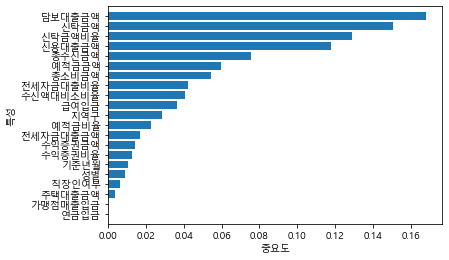

In [217]:
importances=rf2.feature_importances_
indices=np.argsort(importances)[::1]
n_features = x_train2.shape[1]
plt.barh(np.arange(n_features),importances[indices],align='center')
plt.yticks(np.arange(n_features),x_train2.columns[indices])
plt.xlabel('중요도')
plt.ylabel('특성')
plt.ylim(-1,n_features)
plt.show()

### 결론

코로나 거리두기 영향 이전 데이터와  코로나 거리두기 영향 이후 데이터를 이용하여 랜덤포레스트 모델을 만들고 최신데이터를 분류해본 결과 정확도의 향상은 있었지만 전반적인 feature_importance_의 추세는 전체 데이터를 기반으로 분류모델을 만들었을 때와 큰 차이가 보이지 않았다.
시간별 차이 보다는 랜덤포레스트에서 선택한 변수들을 중심으로 해석하거나 새로운 모델링을 해볼 필요가 있다.

